<a href="https://colab.research.google.com/github/enochbayode/Gemini-ai/blob/main/Build_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.1/679.1 kB 8.3 MB/s eta 0:00:00


In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# Used to securely store your API key
from google.colab import userdata



In [4]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [6]:
model = genai.GenerativeModel('gemini-pro')

In [7]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 150 ms, sys: 17.7 ms, total: 167 ms
Wall time: 11.2 s


In [8]:
to_markdown(response.text)

> The meaning of life is a profound and multifaceted philosophical question that has occupied the minds of humans for millennia. There is no single, universally accepted answer, as different individuals and cultures have proposed various perspectives and beliefs. Some of the prominent ideas about the meaning of life include:
> 
> 1. **Purpose-Driven Meaning:** This view holds that life has an intrinsic purpose or goal, such as achieving happiness, fulfilling one's potential, or making a meaningful contribution to society. It suggests that our purpose directs our actions and gives our lives a sense of significance.
> 
> 2. **Existentialist Meaning:** Existentialism posits that life has no inherent meaning and that individuals are responsible for creating their own meaning through their choices and actions. This perspective emphasizes personal freedom, authenticity, and embracing the absurdity of existence.
> 
> 3. **Subjective Meaning:** According to this view, the meaning of life is entirely subjective and varies from person to person. It is based on individual values, beliefs, and experiences. This perspective suggests that there is no objective "correct" answer and that each individual must find their own unique meaning.
> 
> 4. **Religious or Spiritual Meaning:** Many religions and spiritual traditions provide a framework for understanding the meaning of life. These frameworks often involve beliefs in a divine or supreme being, a higher purpose, and an afterlife. Spiritual practices and rituals are seen as ways to connect with this higher purpose and find meaning in life.
> 
> 5. **Evolutionary or Biological Meaning:** Some theories suggest that the meaning of life is rooted in our evolutionary biology. This perspective views life as a process of natural selection, where our purpose is to survive, reproduce, and pass on our genes.
> 
> 6. **Hedonistic Meaning:** Hedonism suggests that the meaning of life is to pursue pleasure and avoid pain. This view focuses on maximizing happiness and minimizing suffering as the primary goal of life.
> 
> 7. **Eudaimonic Meaning:** Eudaimonia, a concept from ancient Greek philosophy, refers to a state of well-being, flourishing, and the realization of one's full potential. This view emphasizes living a life of purpose, virtue, and excellence.
> 
> 8. **Meaninglessness:** Some philosophers argue that life is inherently meaningless, and any attempt to find meaning is futile. This view can lead to existential angst or a sense of futility.
> 
> It's important to note that the meaning of life is not a static concept, and it can change throughout an individual's life experiences, values, and beliefs. Ultimately, finding meaning in life is a personal journey, and what may be meaningful to one person may not be to another. The exploration of this question can lead to deep introspection, self-reflection, and a greater appreciation for the preciousness and fragility of human existence.

In [9]:
response.prompt_feedback

In [10]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a profound and multifaceted philosophical question that has occupied the minds of humans for millennia. There is no single, universally accepted answer, as different individuals and cultures have proposed various perspectives and beliefs. Some of the prominent ideas about the meaning of life include:\n\n1. **Purpose-Driven Meaning:** This view holds that life has an intrinsic purpose or goal, such as achieving happiness, fulfilling one\'s potential, or making a meaningful contribution to society. It suggests that our purpose directs our actions and gives our lives a sense of significance.\n\n2. **Existentialist Meaning:** Existentialism posits that life has no inherent meaning and that individuals are responsible for creating their own meaning through their choices and actions. This perspective emphasizes personal freedom, authenticity, and embracing the absurdity of existence.\n\n3. **Subjective Meaning:** According to this view, 

In [11]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 91.2 ms, sys: 13.2 ms, total: 104 ms
Wall time: 6.89 s


In [12]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a deep philosophical question that has been pondered by humans for
________________________________________________________________________________
 centuries. There is no one definitive answer, as the meaning of life is likely to be different for each individual. However, some common themes that emerge when discussing
________________________________________________________________________________
 the meaning of life include:

* **Purpose:** Many people believe that life has a purpose, or a reason for being. This purpose may be to raise a family, make a difference in the world, or simply to experience all that life has to offer.
* **Values:** The values that we hold dear
________________________________________________________________________________
 can also play a role in shaping the meaning of our lives. For example, if we value compassion, we may choose to live our lives in a way that helps others.
* **Relationships:** The relationships we have with others

In [13]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

In [14]:
response = chat.send_message("Give me a detailed explaination about high school")
print (response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "**High School: An Overview**\n\nHigh school, also known as secondary school, is an educational institution that provides students with instruction following the completion of middle school or junior high. Typically, high school encompasses four academic years, from grades nine through twelve.\n\n**Curriculum and Coursework**\n\nHigh school curriculum aims to prepare students for higher education, vocational training, or direct entry into the workforce. The core subjects typically include:\n\n* English Language Arts\n* Mathematics\n* Science\n* Social Studies\n* Foreign Language\n\nIn addition to core subjects, high schools offer a wide range of elective courses, such as:\n\n* Fine Arts (e.g., music, art, drama)\n* Technology (e.g., computer science, robotics)\n

In [15]:
response.prompt_feedback

In [16]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

In [17]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  5175k      0 --:--:-- --:--:-- --:--:-- 5193k


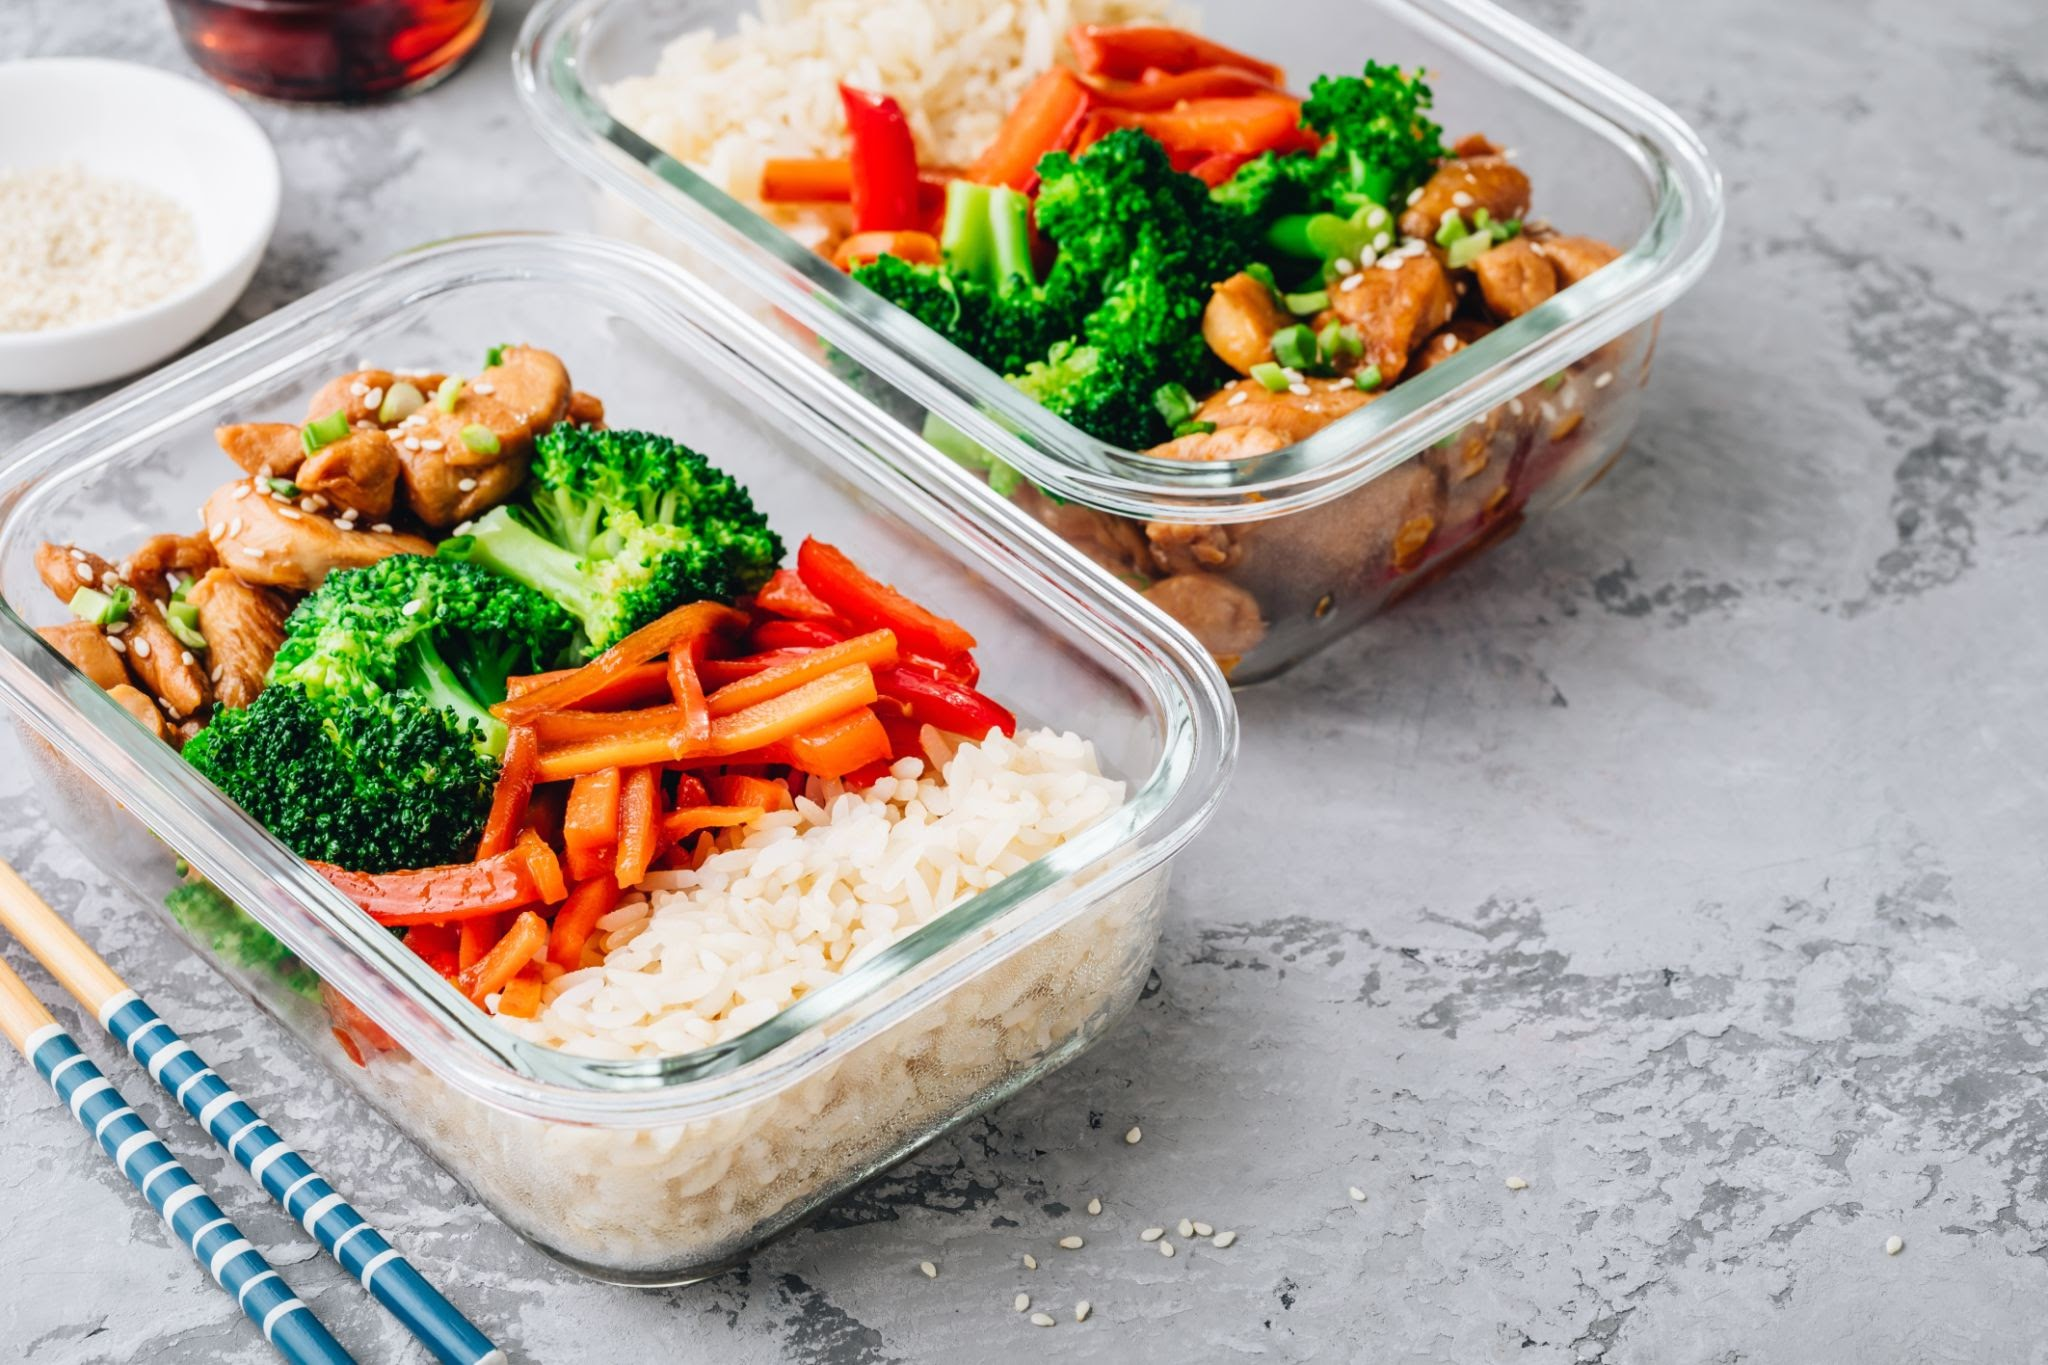

In [18]:
# Check if the file exists
import os

if not os.path.exists('image.jpg'):
    # Download the file again
    !curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [19]:
model = genai.GenerativeModel('gemini-pro-vision')

In [20]:
response = model.generate_content(img)

to_markdown(response.text)

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By planning your meals ahead of time and cooking them in advance, you can make sure that you have healthy and nutritious meals on hand when you're hungry.
> 
> There are many different ways to meal prep, but one popular method is to cook a large batch of food on the weekend and then divide it into individual portions for the week. This can be a great way to save time on busy weeknights, and it can also help you to control your portion sizes.
> 
> When meal prepping, it's important to choose healthy and nutritious foods. This means choosing lean proteins, whole grains, and plenty of fruits and vegetables. You should also avoid processed foods and sugary drinks.
> 
> Here are some tips for meal prepping:
> 
> * Choose healthy and nutritious foods.
> * Cook a large batch of food on the weekend.
> * Divide the food into individual portions for the week.
> * Store the food in airtight containers in the refrigerator or freezer.
> * Label the containers with the date and the contents.
> * When you're ready to eat, reheat the food in the microwave or oven.
> 
> Meal prepping can be a great way to save time, money, and eat healthier. By following these tips, you can make meal prepping a success.

In [ ]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


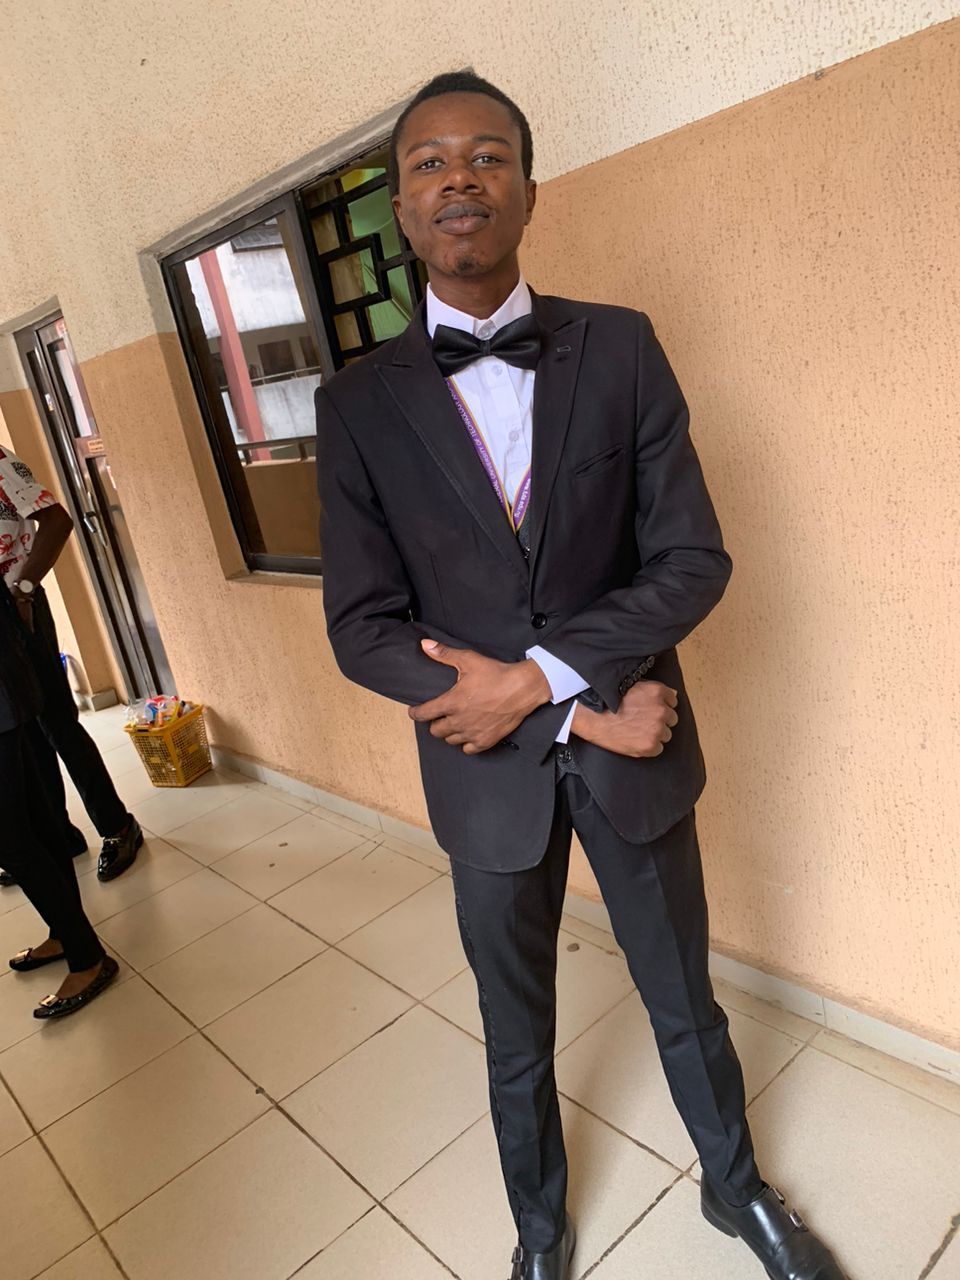

In [25]:
man_img = PIL.Image.open('Enoch in suit.jpg')
man_img

In [26]:
man_img_response = model.generate_content(man_img)

to_markdown(man_img_response.text)

>  A young man wearing a black suit and bow tie.

In [31]:
man_img_response = model.generate_content(["Write a description on the kind of outfit this man wears giving the details of the kind of suit and shoe he is wearing",
                                           man_img], stream=True)

man_img_response.resolve()

to_markdown(man_img_response.text)

>  The man is wearing a black suit and a white shirt. The suit has a black lapel and two buttons. The man is also wearing a black bow tie and a purple sash with a badge. He is wearing black leather shoes.

In [32]:
shoe_name = model.generate_content(["what is the name of the shoe the man in the piture is wearing",
                                           man_img], stream=True)

shoe_name.resolve()

to_markdown(shoe_name.text)

>  The man in the picture is wearing a pair of black leather shoes. The shoes are formal and have a shiny finish. The shoes are also lace-up shoes.

In [ ]:
response = chat.send_message("In one sentence, tell me about Pastor E A Adeboye.")
to_markdown(response.text)

> Pastor E. A. Adeboye is the General Overseer of the Redeemed Christian Church of God (RCCG), a megachurch with millions of members worldwide.

In [ ]:
chat.history

[parts {
   text: "In one sentence, tell me about Pastor E A Adeboye."
 }
 role: "user",
 parts {
   text: "Pastor E. A. Adeboye is the General Overseer of the Redeemed Christian Church of God (RCCG), a megachurch with millions of members worldwide."
 }
 role: "model"]

In [ ]:
response1 = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response1:
  print(chunk.text)
  print("_"*80)

Imagine a really big church with branches all over the world, like a giant tree
________________________________________________________________________________
 with roots in different countries. Pastor E. A. Adeboye is like the главный садовник, or head gardener, of this big church tree.
________________________________________________________________________________
 He's the one who makes sure that all the branches are healthy and growing strong. He travels all over the world, visiting different branches of the church and teaching people about God and how to live good lives. He's written many books about Christianity and how to be a good person. Pastor Adeboye is
________________________________________________________________________________
 a very important religious leader, and people respect him a lot because he helps them to grow closer to God.
________________________________________________________________________________


Embedding help you turn texts into vectors


In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, tell me about Pastor E A Adeboye.

> **model**: Pastor E. A. Adeboye is the General Overseer of the Redeemed Christian Church of God (RCCG), a megachurch with millions of members worldwide.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: Pastor Enoch Adejare Adeboye is the spiritual leader of the Redeemed Christian Church of God (RCCG), one of the largest Pentecostal churches in the world. He is affectionately called "Daddy G.O." by his followers. Pastor Adeboye is known for his powerful sermons, his emphasis on holiness and righteousness, and his commitment to spreading the gospel of Jesus Christ. Under his leadership, RCCG has grown from a small parish in Lagos, Nigeria, to a global movement with over 40,000 parishes in over 198 countries. Pastor Adeboye is also a prolific author and has written over 60 books on Christian living and spirituality. He is respected by Christians and non-Christians alike for his humility, wisdom, and dedication to serving God and humanity.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: Pastor E. A. Adeboye is like the CEO of a huge church called the Redeemed Christian Church of God (RCCG). He's like the boss of all the pastors and churches in RCCG, which is kind of like a big family of churches all over the world. Pastor Adeboye is a really important religious leader, and people respect him a lot because he teaches people about God and how to live good lives. He's also written a lot of books about Christianity and how to be a good person. RCCG has grown a lot under his leadership, and now there are RCCG churches in many countries around the world. Pastor Adeboye is known for being a humble and wise leader who is dedicated to serving God and helping others.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: Imagine a really big church with branches all over the world, like a giant tree with roots in different countries. Pastor E. A. Adeboye is like the главный садовник, or head gardener, of this big church tree. He's the one who makes sure that all the branches are healthy and growing strong. He travels all over the world, visiting different branches of the church and teaching people about God and how to live good lives. He's written many books about Christianity and how to be a good person. Pastor Adeboye is a very important religious leader, and people respect him a lot because he helps them to grow closer to God.

In [ ]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

In [ ]:
model.count_tokens(chat.history)

total_tokens: 551

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


In [ ]:
response.candidates[0].content

parts {
  text: "Pastor E. A. Adeboye is like the CEO of a huge church called the Redeemed Christian Church of God (RCCG). He\'s like the boss of all the pastors and churches in RCCG, which is kind of like a big family of churches all over the world. Pastor Adeboye is a really important religious leader, and people respect him a lot because he teaches people about God and how to live good lives. He\'s also written a lot of books about Christianity and how to be a good person. RCCG has grown a lot under his leadership, and now there are RCCG churches in many countries around the world. Pastor Adeboye is known for being a humble and wise leader who is dedicated to serving God and helping others."
}
role: "model"

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[-0.0019502948, -0.04149048, -0.033446487, 0.00603 ... TRIMMED ...
